<a href="https://colab.research.google.com/github/mirzab/Complexity/blob/master/Kuramoto_Model_with_Critical_Slowing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

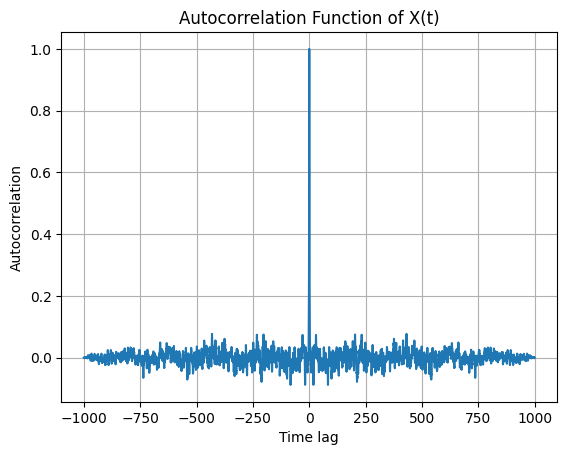

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
T = 1000  # Total time
dt = 0.01  # Time step
N = int(T / dt)  # Number of time steps
D = 1  # Diffusion coefficient

# Initial conditions
X0 = 1  # or 0, depending on the preparation condition
X = np.zeros(N+1)
X[0] = X0

# Simulate the dynamics using Euler-Maruyama method
for i in range(N):
    dXdt = -X[i] * dt + np.sqrt(2 * D * dt) * np.random.randn()
    X[i+1] = X[i] + dXdt

# Compute autocorrelation function
acf = np.correlate(X, X, mode='full') / np.dot(X, X)  # normalized autocorrelation
lags = np.arange(-N, N+1) * dt

# Plot results
plt.plot(lags, acf)
plt.xlabel('Time lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function of X(t)')
plt.grid(True)
plt.show()


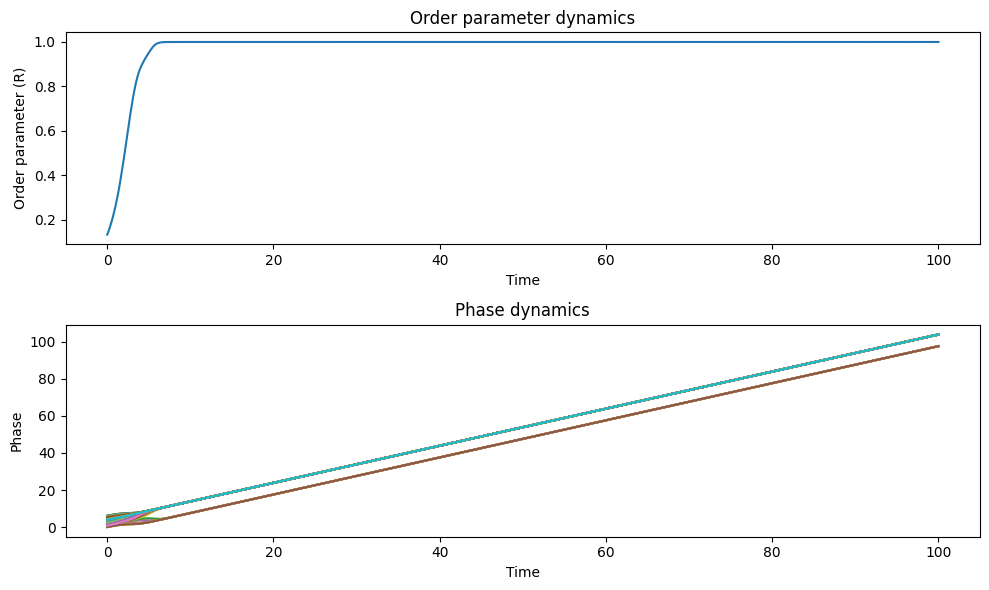

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
for i in range(num_steps):
    theta_dot = omega0 + K/N * np.sum(np.sin(theta - theta[:, np.newaxis]), axis=1)  # Kuramoto equation
    theta_dot += sigma * np.random.randn(N)  # Add noise
    theta += theta_dot * dt  # Euler method
    theta_history[:, i] = theta

# Calculate order parameter (mean phase coherence)
R = np.abs(np.mean(np.exp(1j * theta_history), axis=0))

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, R)
plt.xlabel('Time')
plt.ylabel('Order parameter (R)')
plt.title('Order parameter dynamics')

plt.subplot(2, 1, 2)
plt.plot(t, theta_history.T)
plt.xlabel('Time')
plt.ylabel('Phase')
plt.title('Phase dynamics')

plt.tight_layout()
plt.show()


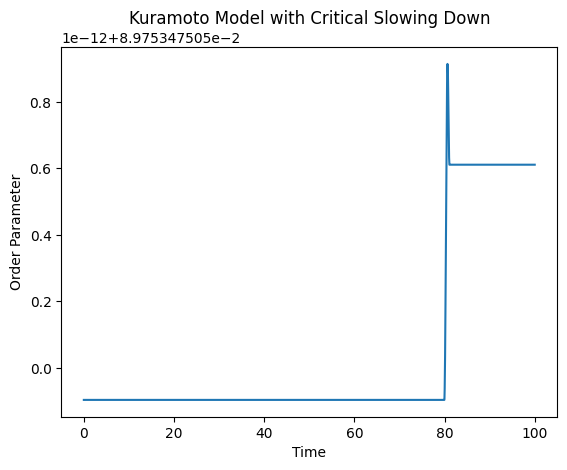

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Set the parameters
N = 100  # Number of oscillators
dt = 0.01  # Time step
T = 100  # Total time
omega = 2 * np.pi * 0.9  # Natural frequency
k = 1  # Coupling strength

# Initialize the oscillators
#theta = np.random.uniform(0, 2 * np.pi, N)
theta += dt * (omega + (k / N) * np.sum(np.sin(theta - theta[:, None]))) + np.sqrt(dt) * np.random.randn(N)

# Lists for storing data
time_list = []
order_parameter_list = []

# Simulate the Kuramoto model
for t in range(int(T / dt)):
    # Update the phases
    theta += dt * (omega + (k / N) * np.sum(np.sin(theta - theta[:, None])))

    # Calculate the order parameter
    order_parameter = np.abs(np.mean(np.exp(1j * theta)))

    # Store data
    time_list.append(t * dt)
    order_parameter_list.append(order_parameter)

# Plot the order parameter vs time
plt.plot(time_list, order_parameter_list)
plt.xlabel("Time")
plt.ylabel("Order Parameter")
plt.title("Kuramoto Model with Critical Slowing Down")
plt.show()

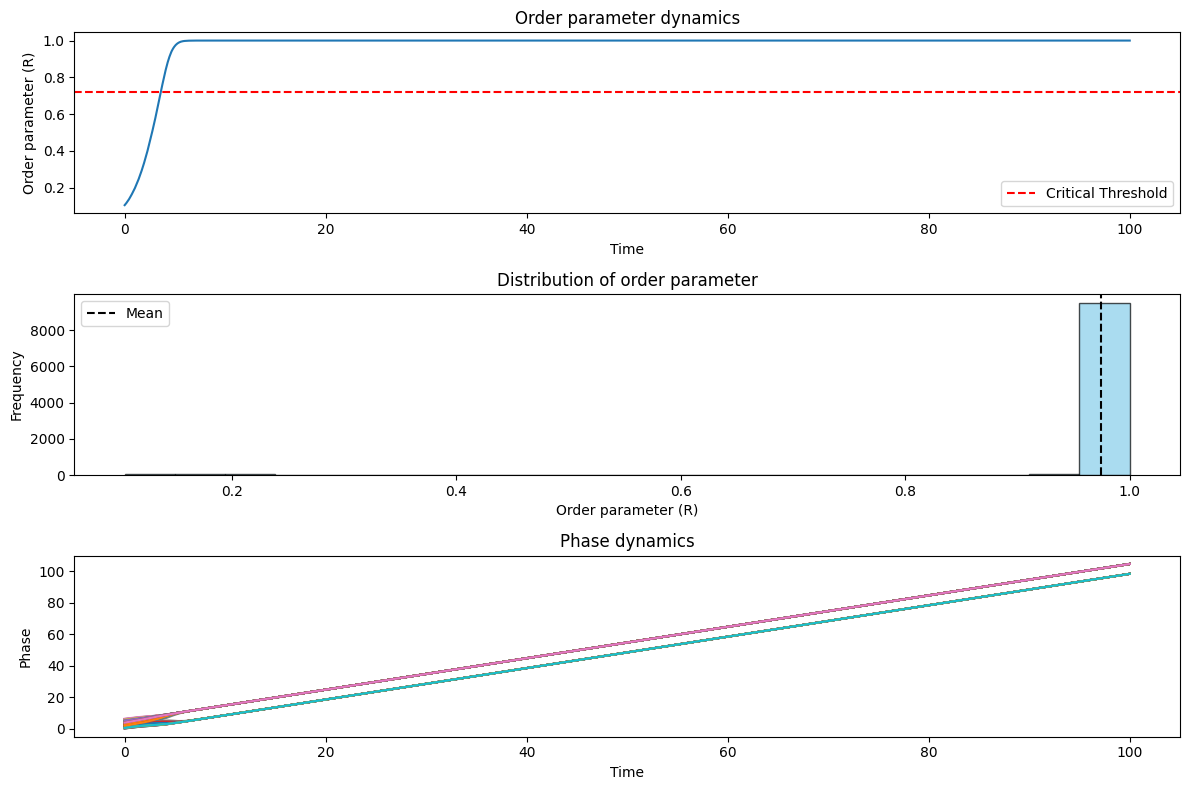

Analysis Results:
Mean order parameter: 0.9744581948219376
Standard deviation of order parameter: 0.12748169992800729
Maximum order parameter: 0.9999581110714365
Minimum order parameter: 0.1045633466259636
Time to reach equilibrium: 0.0


In [ ]:
# Python code for simulating the Kuramoto model and observing critical slowing down

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
for i in range(num_steps):
    # Compute Kuramoto equation with noise
    theta_dot = omega0 + K/N * np.sum(np.sin(theta - theta[:, np.newaxis]), axis=1)
    theta_dot += sigma * np.random.randn(N)  # Add noise
    theta += theta_dot * dt  # Euler method
    theta_history[:, i] = theta

# Calculate order parameter (mean phase coherence)
R = np.abs(np.mean(np.exp(1j * theta_history), axis=0))

# Analyze critical slowing down
mean_R = np.mean(R)  # Mean order parameter
std_R = np.std(R)  # Standard deviation of order parameter
max_R = np.max(R)  # Maximum order parameter
min_R = np.min(R)  # Minimum order parameter
critical_threshold = mean_R - 2 * std_R  # Threshold for critical slowing down

# Determine time to reach equilibrium
time_to_equilibrium = t[np.where(R <= critical_threshold)[0][0]]

# Plot results
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(t, R)
plt.axhline(critical_threshold, color='r', linestyle='--', label='Critical Threshold')
plt.xlabel('Time')
plt.ylabel('Order parameter (R)')
plt.title('Order parameter dynamics')
plt.legend()

plt.subplot(3, 1, 2)
plt.hist(R, bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(mean_R, color='k', linestyle='--', label='Mean')
plt.xlabel('Order parameter (R)')
plt.ylabel('Frequency')
plt.title('Distribution of order parameter')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, theta_history.T)
plt.xlabel('Time')
plt.ylabel('Phase')
plt.title('Phase dynamics')

plt.tight_layout()
plt.show()

# Print analysis results
print("Analysis Results:")
print("Mean order parameter:", mean_R)
print("Standard deviation of order parameter:", std_R)
print("Maximum order parameter:", max_R)
print("Minimum order parameter:", min_R)
print("Time to reach equilibrium:", time_to_equilibrium)


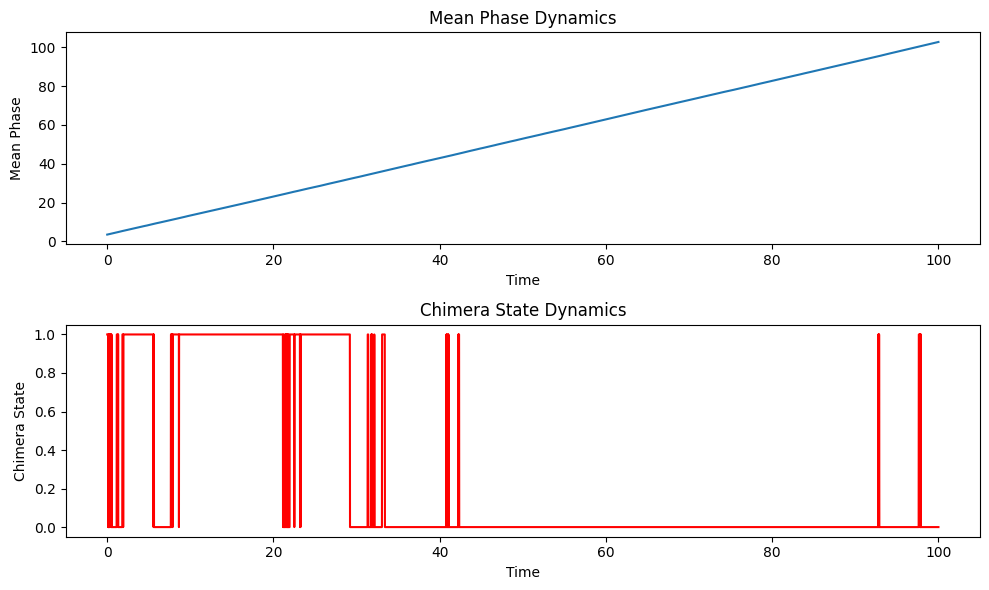

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Function to calculate chimera state
def calculate_chimera_state(theta):
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_states = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta += dt * (omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None] - omega0 * dt))) + sigma * np.sqrt(dt) * np.random.randn(N)
    theta_history[:, i] = theta

    # Check for chimera state
    chimera_states.append(calculate_chimera_state(theta))

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, np.mean(theta_history, axis=0))
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

plt.subplot(2, 1, 2)
plt.plot(t, chimera_states, 'r')
plt.xlabel('Time')
plt.ylabel('Chimera State')
plt.title('Chimera State Dynamics')

plt.tight_layout()
plt.show()


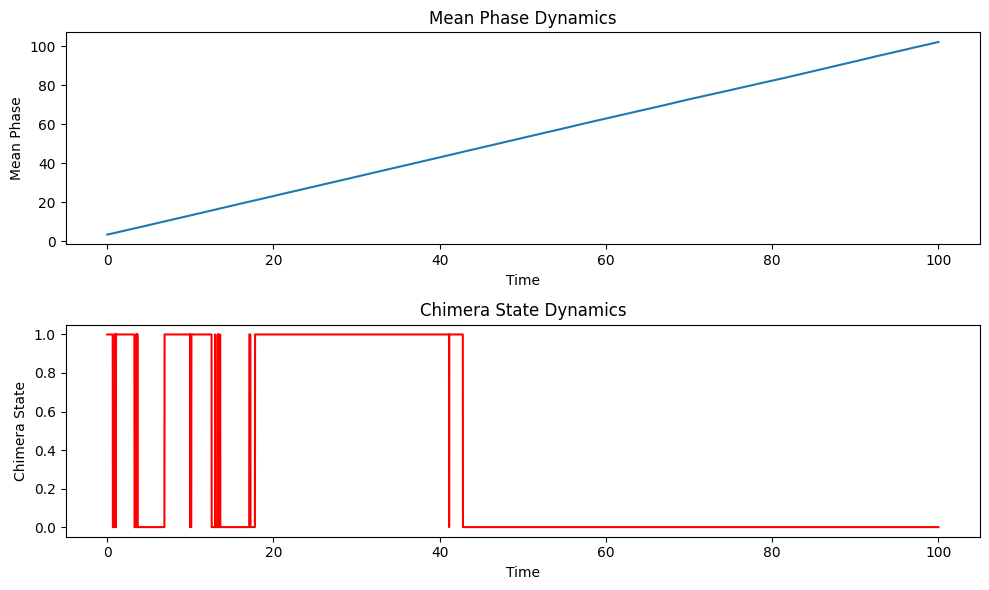

In [ ]:
"""
Simulating the Kuramoto Model with Chimera State Detection

This code simulates the Kuramoto model and detects the presence of chimera states.

The Kuramoto model describes the dynamics of a population of coupled oscillators. A chimera state
is a phenomenon where the population splits into synchronized and desynchronized groups.

We divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

"""

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Function to calculate chimera state
def calculate_chimera_state(theta):
    """
    Calculate the presence of a chimera state.

    Divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
    subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

    :param theta: Phase of oscillators
    :return: True if chimera state is detected, False otherwise
    """
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_states = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta += dt * (omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None] - omega0 * dt))) + sigma * np.sqrt(dt) * np.random.randn(N)
    theta_history[:, i] = theta

    # Check for chimera state
    chimera_states.append(calculate_chimera_state(theta))

# Plot results
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, np.mean(theta_history, axis=0))
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

plt.subplot(2, 1, 2)
plt.plot(t, chimera_states, 'r')
plt.xlabel('Time')
plt.ylabel('Chimera State')
plt.title('Chimera State Dynamics')

plt.tight_layout()
plt.show()


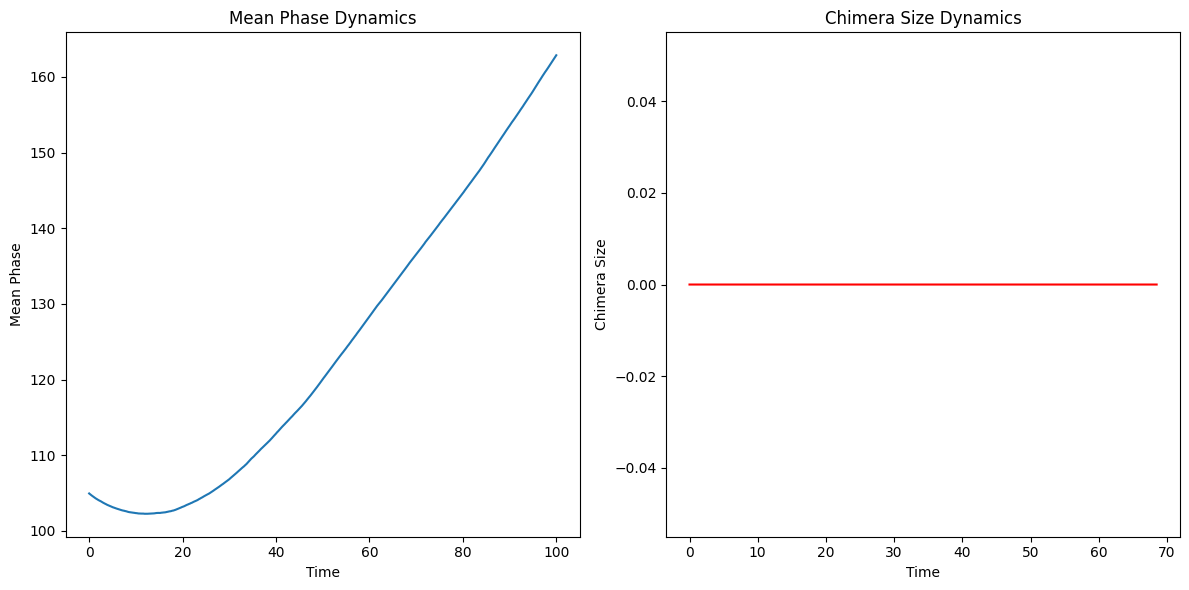

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Function to calculate chimera state
def calculate_chimera_state(theta):
    """
    Calculate the presence of a chimera state.

    Divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
    subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

    :param theta: Phase of oscillators
    :return: True if chimera state is detected, False otherwise
    """
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to characterize chimera patterns
def characterize_chimera_patterns(theta):
    """
    Characterize the chimera patterns in the Kuramoto model.

    :param theta: Phase of oscillators
    :return: chimera_size (int), chimera_shape (array)
    """
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Extract the shape of the chimera state
        chimera_shape = np.zeros(N)
        chimera_shape[synchronized_oscillators] = 1

        # Extract the stability of the chimera state
        # This can be done by simulating the system for a longer time and checking if the chimera state persists
        # or if it changes or disappears.

        return chimera_size, chimera_shape

    else:
        return None, None

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_sizes = []
chimera_shapes = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta = theta + dt * (omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None] - omega0 * dt))) + sigma * np.sqrt(dt) * np.random.randn(N)
    theta_history[:, i] = theta

    # Characterize chimera patterns
    chimera_size, chimera_shape = characterize_chimera_patterns(theta)
    if chimera_size is not None:
        chimera_sizes.append(chimera_size)
        chimera_shapes.append(chimera_shape)

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, np.mean(theta_history, axis=0))
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

plt.subplot(1, 2, 2)
plt.plot(t[:len(chimera_sizes)], chimera_sizes, 'r')
plt.xlabel('Time')
plt.ylabel('Chimera Size')
plt.title('Chimera Size Dynamics')

plt.tight_layout()
plt.show()


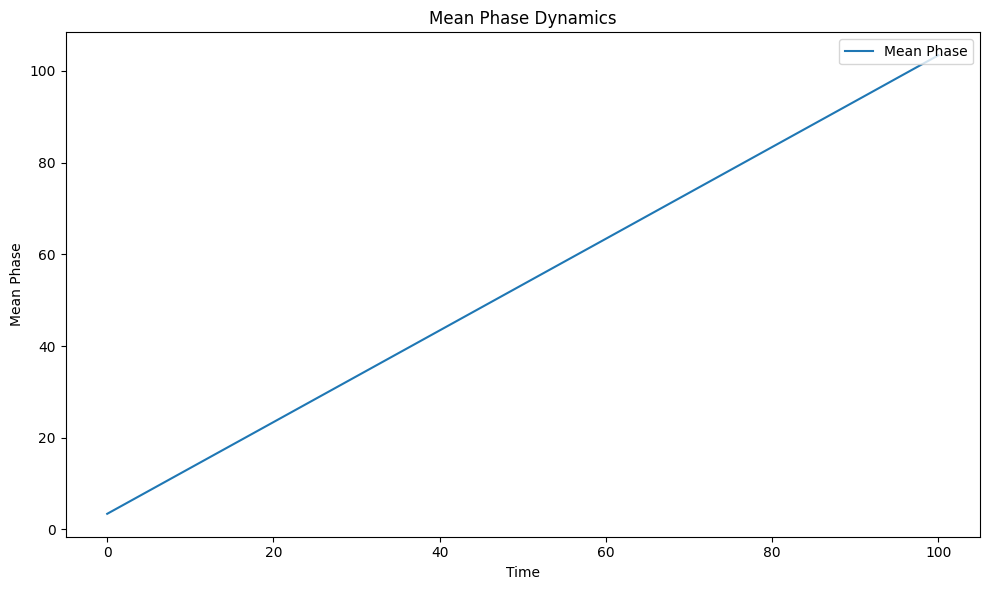

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Function to calculate chimera state
def calculate_chimera_state(theta):
    """
    Calculate the presence of a chimera state.

    Divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
    subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

    :param theta: Phase of oscillators
    :return: True if chimera state is detected, False otherwise
    """
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to characterize chimera patterns
def characterize_chimera_patterns(theta):
    """
    Characterize chimera patterns.

    Identify the chimera state, extract its size, shape, and stability.

    :param theta: Phase of oscillators
    :return: Chimera size, shape, and stability
    """
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Extract the shape of the chimera state
        chimera_shape = np.zeros(N)
        chimera_shape[synchronized_oscillators] = 1

        # Extract the stability of the chimera state
        # Simulate the system for a longer time to check if the chimera state persists
        # Here, we simulate for an additional 1000 steps
        additional_steps = 1000
        for i in range(additional_steps):
            theta_dot = omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None]), axis=1) + sigma * np.random.randn(N)
            theta += dt * theta_dot

            if not calculate_chimera_state(theta):
                return chimera_size, chimera_shape, False  # Chimera state has disappeared

        return chimera_size, chimera_shape, True  # Chimera state persists
    else:
        return None

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_info = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta_dot = omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None]), axis=1) + sigma * np.random.randn(N)
    theta += dt * theta_dot
    theta_history[:, i] = theta

    # Characterize chimera patterns
    chimera_data = characterize_chimera_patterns(theta)
    if chimera_data is not None:
        chimera_info.append((i*dt, *chimera_data))  # Record time, size, shape, and stability

# Plot results
plt.figure(figsize=(10, 6))

plt.plot(t, np.mean(theta_history, axis=0), label='Mean Phase')
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

# Plot chimera patterns
for chimera_time, chimera_size, chimera_shape, chimera_stability in chimera_info:
    plt.axvline(x=chimera_time, color='r', linestyle='--')

# Create custom legend for chimera states
plt.legend(['Mean Phase', 'Chimera State'], loc='upper right')

plt.tight_layout()
plt.show()


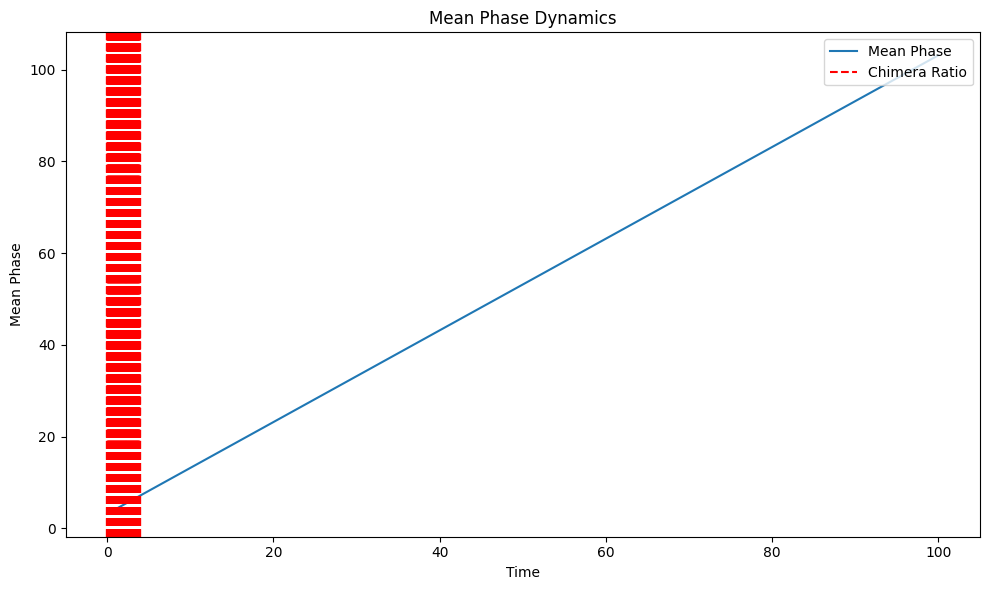

In [ ]:
# Simulating and Analyzing Chimera Patterns in the Kuramoto Model

import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Initial conditions
theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

# Function to calculate chimera state
def calculate_chimera_state(theta):
    """
    Calculate the presence of a chimera state.

    Divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
    subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

    :param theta: Phase of oscillators
    :return: True if chimera state is detected, False otherwise
    """
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to calculate chimera ratio
def calculate_chimera_ratio(theta):
    """
    Calculate the chimera ratio.

    The chimera ratio is a measure of the degree of synchronization within the chimera state.
    It is defined as the ratio of the number of synchronized oscillators to the total number of oscillators.

    :param theta: Phase of oscillators
    :return: Chimera ratio if chimera state is detected, None otherwise
    """
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Calculate the chimera ratio
        chimera_ratio = chimera_size / N

        return chimera_ratio

    else:
        return None

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_info = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta_dot = omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None]), axis=1) + sigma * np.random.randn(N)
    theta += dt * theta_dot
    theta_history[:, i] = theta

# Plot results
plt.figure(figsize=(10, 6))

plt.plot(t, np.mean(theta_history, axis=0), label='Mean Phase')
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

# Calculate and plot chimera ratio
chimera_ratios = []
for i in range(num_steps):
    chimera_ratio = calculate_chimera_ratio(theta_history[:, i])
    if chimera_ratio is not None:
        chimera_ratios.append((i*dt, chimera_ratio))
        plt.axvline(x=i*dt, color='r', linestyle='--', label='Chimera Ratio' if i == 0 else None)

# Custom legend for chimera ratio
if len(chimera_ratios) > 0:
    plt.legend(['Mean Phase', 'Chimera Ratio'], loc='upper right')

plt.tight_layout()
plt.show()

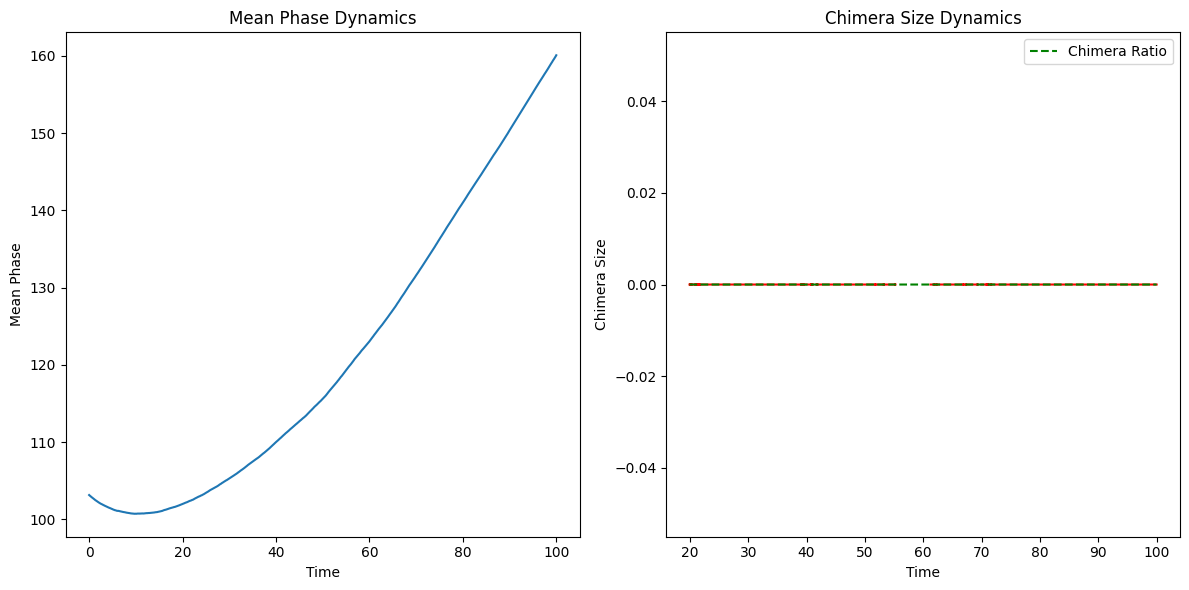

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
K = 1.5  # Coupling strength
omega0 = 1  # Natural frequency
sigma = 0.2  # Noise strength

# Time parameters
T = 100  # Total time
dt = 0.01  # Time step
t = np.arange(0, T + dt, dt)  # Time vector
num_steps = len(t)

# Function to calculate chimera state
def calculate_chimera_state(theta):
    """
    Calculate the presence of a chimera state.

    Divide the oscillators into two subpopulations, calculate the Kuramoto order parameter for each
    subpopulation, and detect a chimera state if the order parameters for the two subpopulations differ significantly.

    :param theta: Phase of oscillators
    :return: True if chimera state is detected, False otherwise
    """
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to calculate chimera ratio
def calculate_chimera_ratio(theta):
    """
    Calculate the chimera ratio.

    The chimera ratio is a measure of the degree of synchronization within the chimera state.
    It is defined as the ratio of the number of synchronized oscillators to the total number of oscillators.

    :param theta: Phase of oscillators
    :return: Chimera ratio if chimera state is detected, None otherwise
    """
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Calculate the chimera ratio
        chimera_ratio = chimera_size / N

        return chimera_ratio

    else:
        return None

# Function to characterize chimera patterns
def characterize_chimera_patterns(theta):
    """
    Characterize the chimera patterns in the Kuramoto model.

    :param theta: Phase of oscillators
    :return: chimera_size (int), chimera_shape (array)
    """
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Extract the shape of the chimera state
        chimera_shape = np.zeros(N)
        chimera_shape[synchronized_oscillators] = 1

        # Extract the stability of the chimera state
        # This can be done by simulating the system for a longer time and checking if the chimera state persists
        # or if it changes or disappears.

        return chimera_size, chimera_shape

    else:
        return None, None

# Simulate dynamics
theta_history = np.zeros((N, num_steps))
chimera_sizes = []
chimera_shapes = []
chimera_ratios = []
for i in range(num_steps):
    # Update Kuramoto equation with noise
    theta = theta + dt * (omega0 + (K / N) * np.sum(np.sin(theta - theta[:, None] - omega0 * dt))) + sigma * np.sqrt(dt) * np.random.randn(N)
    theta_history[:, i] = theta

    # Characterize chimera patterns
    chimera_size, chimera_shape = characterize_chimera_patterns(theta)
    chimera_sizes.append(chimera_size)  # Append size
    chimera_shapes.append(chimera_shape)  # Append shape
    chimera_ratio = calculate_chimera_ratio(theta)
    if chimera_ratio is not None:
        chimera_ratios.append((i*dt, chimera_ratio))  # Append time and ratio

# Plot results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(t, np.mean(theta_history, axis=0))
plt.xlabel('Time')
plt.ylabel('Mean Phase')
plt.title('Mean Phase Dynamics')

plt.subplot(1, 2, 2)
plt.plot(t, chimera_sizes, 'r')
plt.xlabel('Time')
plt.ylabel('Chimera Size')
plt.title('Chimera Size Dynamics')

# Plot chimera ratio
if chimera_ratios:
    times, ratios = zip(*chimera_ratios)
    plt.plot(times, ratios, 'g--', label='Chimera Ratio')
    plt.legend()

plt.tight_layout()
plt.show()

Simulating for K = 0.5, sigma = 0.1...
Chimera ratio: 0.0


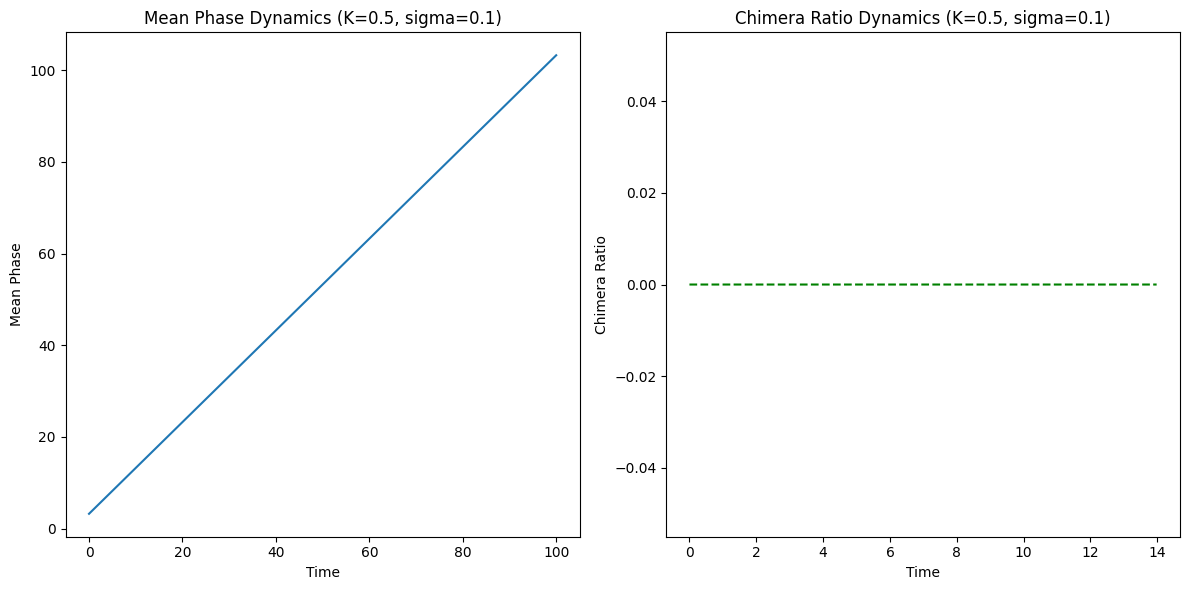

Simulating for K = 0.5, sigma = 0.2...
No chimera state detected during the simulation.


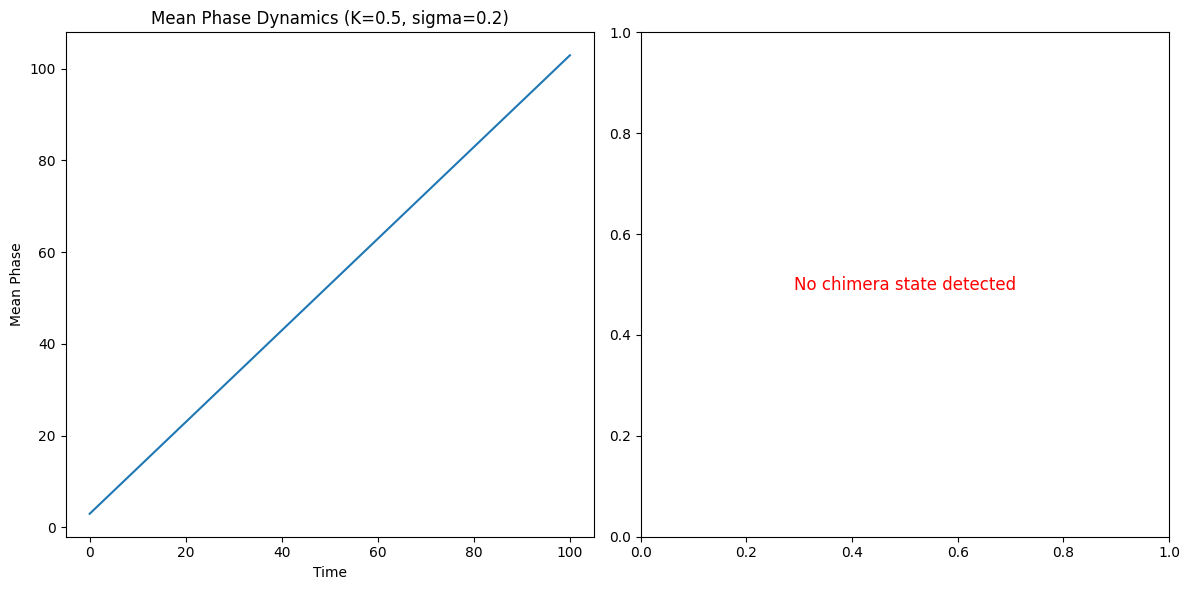

Simulating for K = 0.5, sigma = 0.3...
No chimera state detected during the simulation.


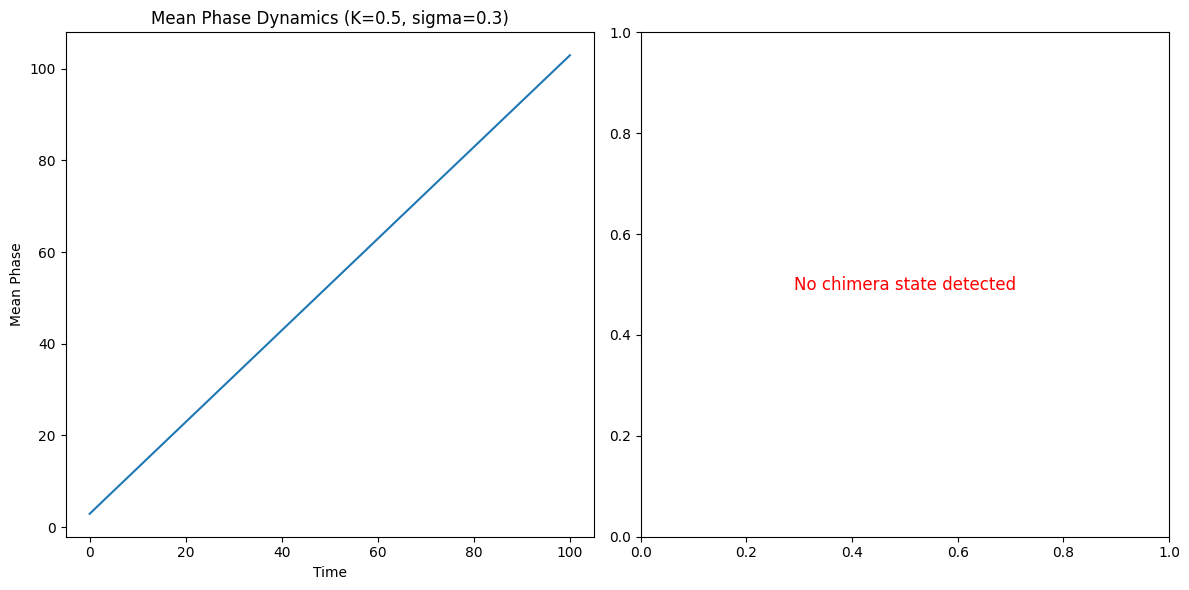

Simulating for K = 1.0, sigma = 0.1...
No chimera state detected during the simulation.


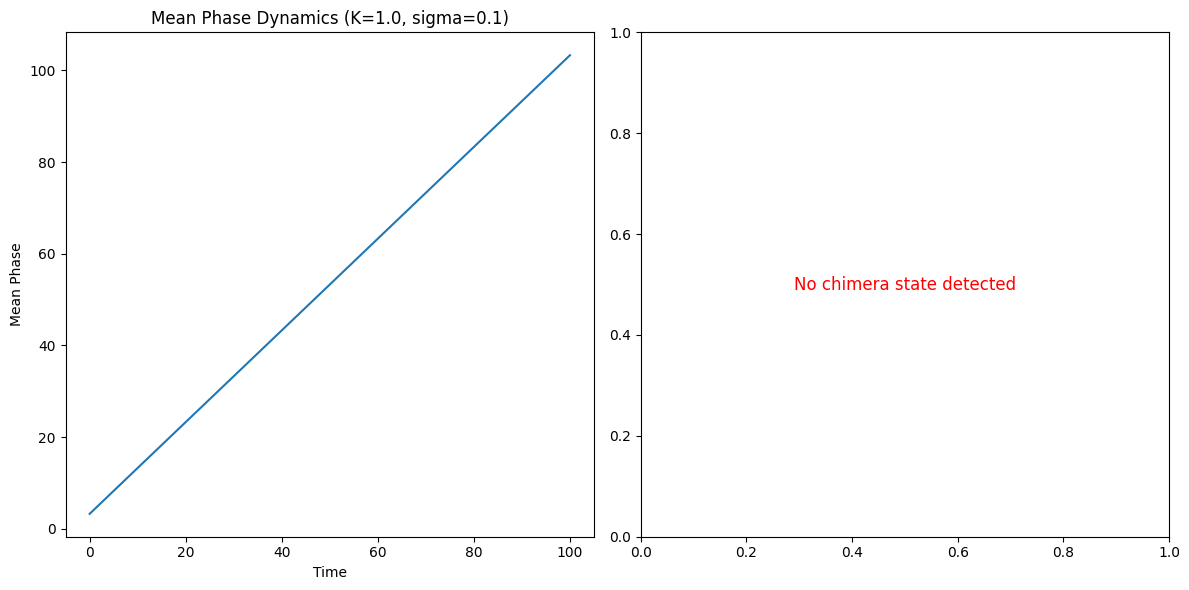

Simulating for K = 1.0, sigma = 0.2...
No chimera state detected during the simulation.


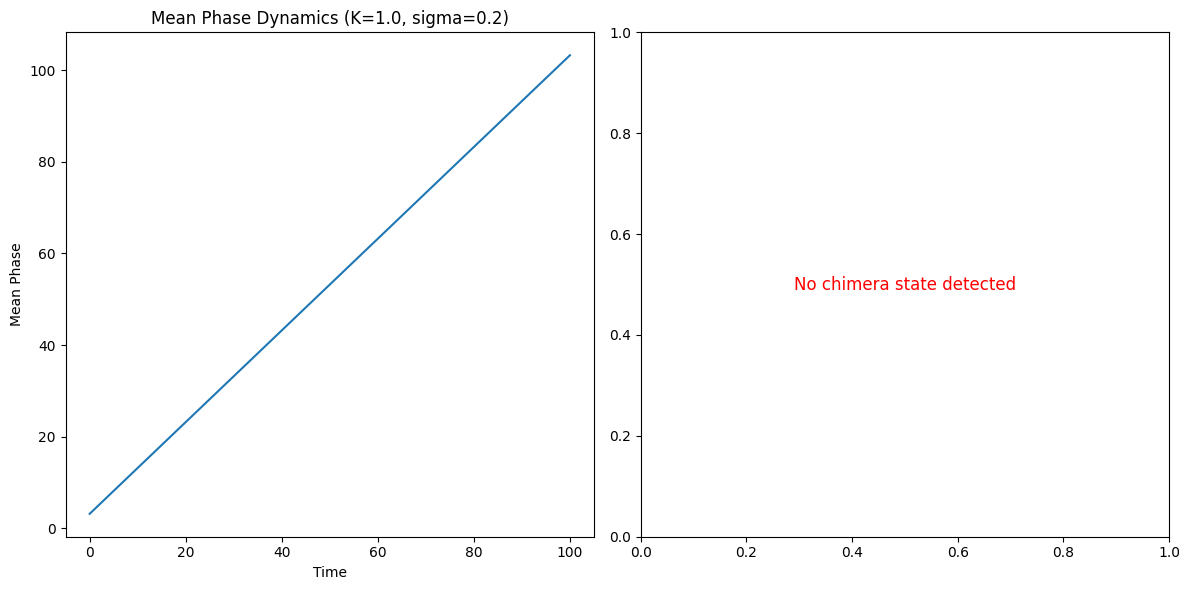

Simulating for K = 1.0, sigma = 0.3...
Chimera ratio: 0.0


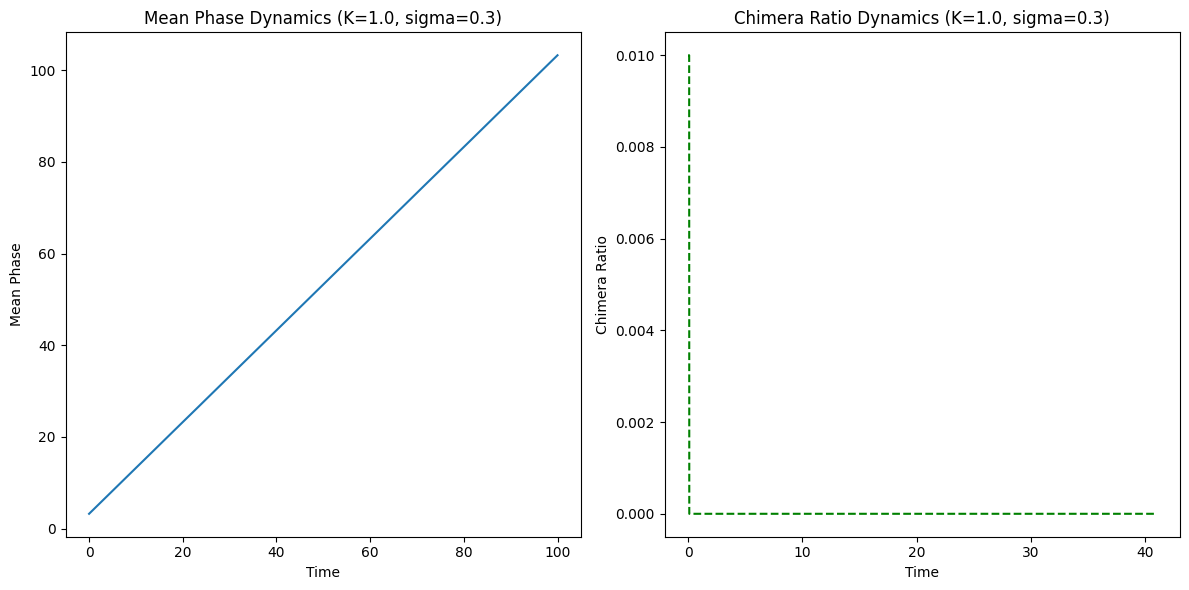

Simulating for K = 1.5, sigma = 0.1...
No chimera state detected during the simulation.


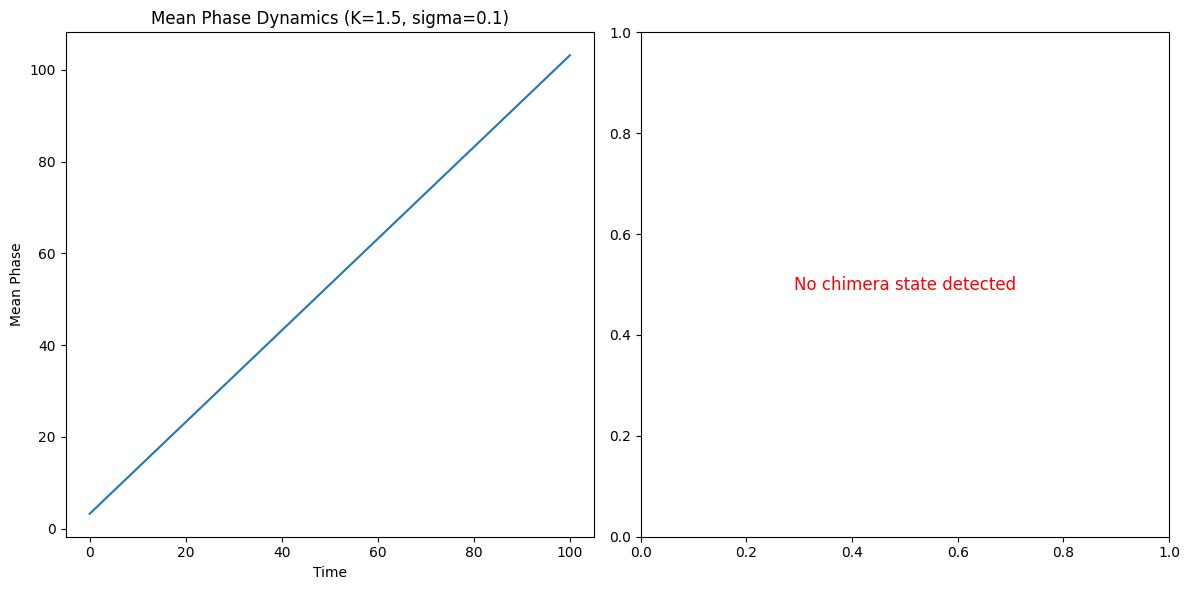

Simulating for K = 1.5, sigma = 0.2...
Chimera ratio: 0.0


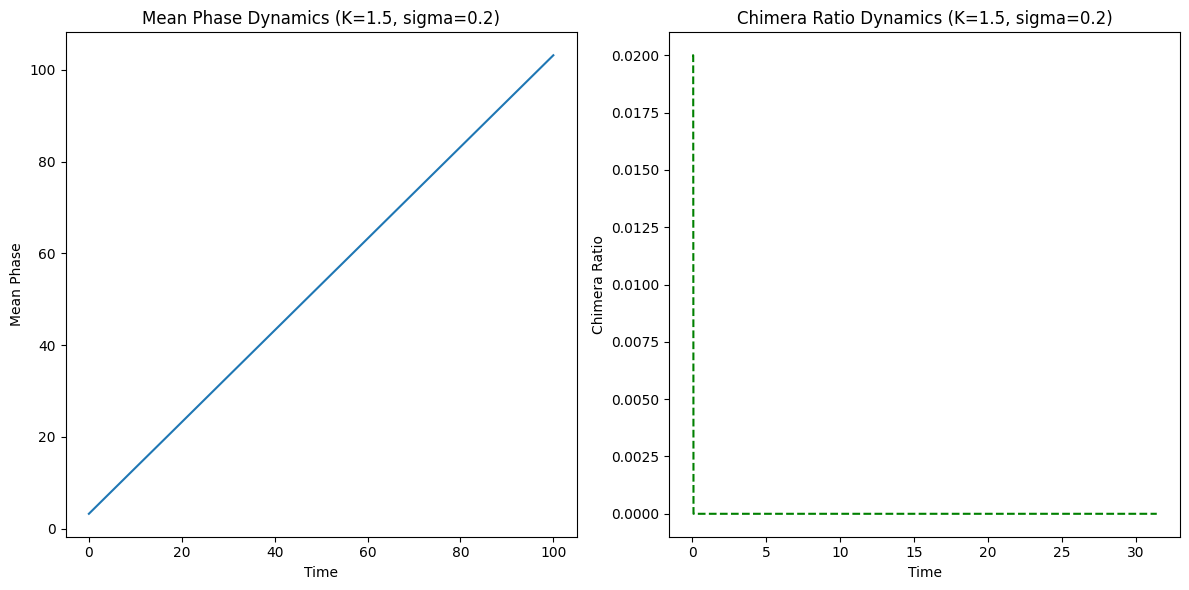

Simulating for K = 1.5, sigma = 0.3...
Chimera ratio: 0.0


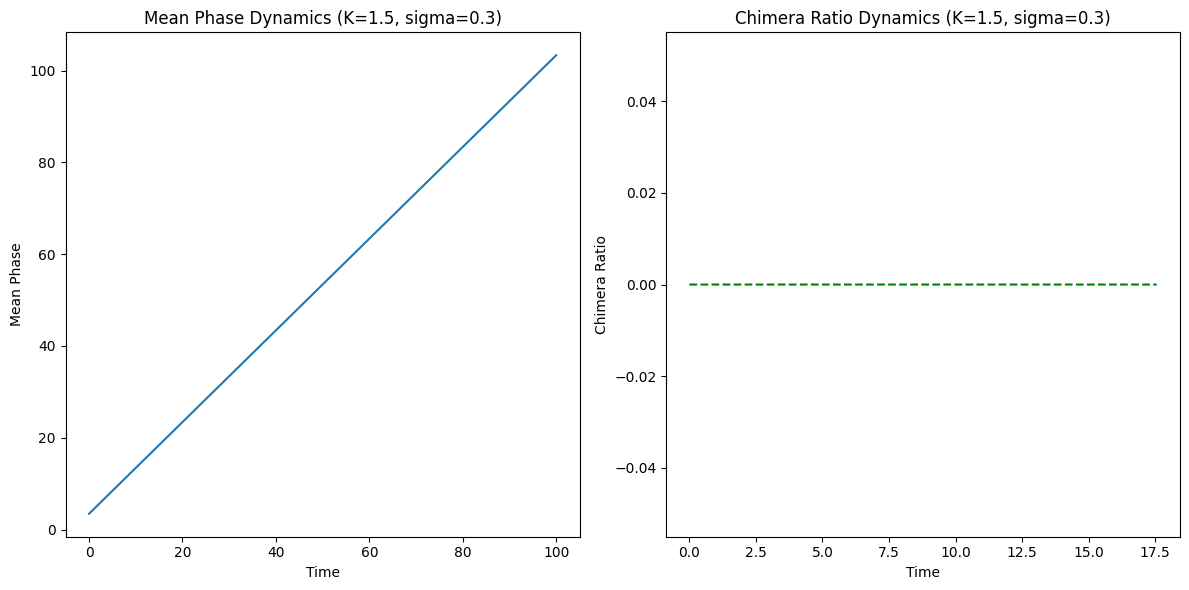

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
N = 100  # Number of oscillators
omega0 = 1.0  # Natural frequency
T = 100  # Total time
dt = 0.01  # Time step
num_steps = int(T / dt)

# Function to calculate chimera state
def calculate_chimera_state(theta):
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to calculate chimera ratio
def calculate_chimera_ratio(theta):
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Calculate the chimera ratio
        chimera_ratio = chimera_size / N

        return chimera_ratio

    else:
        return None

# Function to simulate dynamics
def simulate_dynamics(adjacency_matrix, K, sigma):
    theta_history = np.zeros((N, num_steps))
    chimera_ratios = []

    # Initialize the phases of the oscillators
    theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

    for i in range(num_steps):
        # Update Kuramoto equation with noise and coupling
        theta_dot = omega0 + (K / N) * np.dot(adjacency_matrix, np.sin(theta - theta[:, None])).diagonal() + sigma * np.random.randn(N)
        theta += dt * theta_dot
        theta_history[:, i] = theta

        # Calculate chimera ratio at each time step
        chimera_ratio = calculate_chimera_ratio(theta)
        if chimera_ratio is not None:
            chimera_ratios.append((i * dt, chimera_ratio))

    return theta_history, chimera_ratios

# Create a ring lattice network topology
adjacency_matrix = np.zeros((N, N))
for i in range(N):
    adjacency_matrix[i, (i + 1) % N] = 1
    adjacency_matrix[(i + 1) % N, i] = 1

# Simulate dynamics for different values of coupling strength and noise strength
coupling_strengths = [0.5, 1.0, 1.5]
noise_strengths = [0.1, 0.2, 0.3]

for K in coupling_strengths:
    for sigma in noise_strengths:
        print(f"Simulating for K = {K}, sigma = {sigma}...")
        theta_history, chimera_ratios = simulate_dynamics(adjacency_matrix, K, sigma)

        # Print the results
        if chimera_ratios:
            print("Chimera ratio:", chimera_ratios[-1][1])  # Print the chimera ratio
        else:
            print("No chimera state detected during the simulation.")

        # Plot results
        plt.figure(figsize=(12, 6))

        plt.subplot(1, 2, 1)
        plt.plot(np.arange(0, T, dt), np.mean(theta_history, axis=0))
        plt.xlabel('Time')
        plt.ylabel('Mean Phase')
        plt.title(f'Mean Phase Dynamics (K={K}, sigma={sigma})')

        plt.subplot(1, 2, 2)
        if chimera_ratios:
            times, ratios = zip(*chimera_ratios)
            plt.plot(times, ratios, 'g--', label='Chimera Ratio')
            plt.xlabel('Time')
            plt.ylabel('Chimera Ratio')
            plt.title(f'Chimera Ratio Dynamics (K={K}, sigma={sigma})')
        else:
            plt.text(0.5, 0.5, 'No chimera state detected', horizontalalignment='center', verticalalignment='center', fontsize=12, color='red')

        plt.tight_layout()
        plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import watts_strogatz_graph

# Parameters
N = 100  # Number of oscillators
omega0 = 1.0  # Natural frequency
T = 100  # Total time
dt = 0.01  # Time step
num_steps = int(T / dt)

# Function to calculate chimera state
def calculate_chimera_state(theta):
    # Divide the oscillators into two subpopulations
    subpopulation_1 = theta[:N//2]
    subpopulation_2 = theta[N//2:]

    # Calculate the Kuramoto order parameter for each subpopulation
    order_parameter_1 = np.abs(np.mean(np.exp(1j * subpopulation_1)))
    order_parameter_2 = np.abs(np.mean(np.exp(1j * subpopulation_2)))

    # Check if the order parameters are different
    if np.abs(order_parameter_1 - order_parameter_2) > 0.1:
        return True
    else:
        return False

# Function to calculate chimera ratio
def calculate_chimera_ratio(theta):
    # Identify the chimera state
    if calculate_chimera_state(theta):
        # Extract the size of the chimera state
        synchronized_oscillators = np.where(np.abs(theta) < 0.1)[0]
        chimera_size = len(synchronized_oscillators)

        # Calculate the chimera ratio
        chimera_ratio = chimera_size / N

        return chimera_ratio

    else:
        return None

# Function to simulate dynamics
def simulate_dynamics(adjacency_matrix, K, sigma):
    theta_history = np.zeros((N, num_steps))
    chimera_ratios = []

    # Initialize the phases of the oscillators
    theta = np.random.rand(N) * 2 * np.pi  # Initial phase of oscillators

    for i in range(num_steps):
        # Update Kuramoto equation with noise and coupling
        theta_dot = omega0 + (K / N) * np.dot(adjacency_matrix, np.sin(theta - theta[:, None])).diagonal() + sigma * np.random.randn(N)
        theta += dt * theta_dot
        theta_history[:, i] = theta

        # Calculate chimera ratio at each time step
        chimera_ratio = calculate_chimera_ratio(theta)
        if chimera_ratio is not None:
            chimera_ratios.append((i * dt, chimera_ratio))

    return chimera_ratios

# Define the network topologies
network_topologies = ["ring_lattice", "small_world"]

# Collect chimera ratios for all simulations
all_chimera_ratios = {}

# Loop over the network topologies
for network_topology in network_topologies:
    # Implement the network topology
    if network_topology == "ring_lattice":
        adjacency_matrix = np.zeros((N, N))
        for i in range(N):
            adjacency_matrix[i, (i + 1) % N] = 1
            adjacency_matrix[(i + 1) % N, i] = 1
    elif network_topology == "small_world":
        adjacency_matrix = watts_strogatz_graph(N, k=4, p=0.1).adjacency_matrix().toarray()

    # Simulate the system for different values of the coupling strength and noise strength
    for K in np.linspace(0.1, 2, 20):
        for sigma in np.linspace(0, 0.5, 20):
            print(f"Simulating for network topology '{network_topology}', K = {K:.2f}, sigma = {sigma:.2f}...")
            chimera_ratios = simulate_dynamics(adjacency_matrix, K, sigma)

            # Store chimera ratios
            all_chimera_ratios[(network_topology, K, sigma)] = chimera_ratios

# Plot all chimera ratios
plt.figure(figsize=(10, 6))

for key, chimera_ratios in all_chimera_ratios.items():
    network_topology, K, sigma = key
    if chimera_ratios:
        times, ratios = zip(*chimera_ratios)
        plt.plot(times, ratios, label=f"{network_topology} (K={K:.2f}, sigma={sigma:.2f})")

plt.xlabel('Time')
plt.ylabel('Chimera Ratio')
plt.title('Chimera Ratio Dynamics')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
